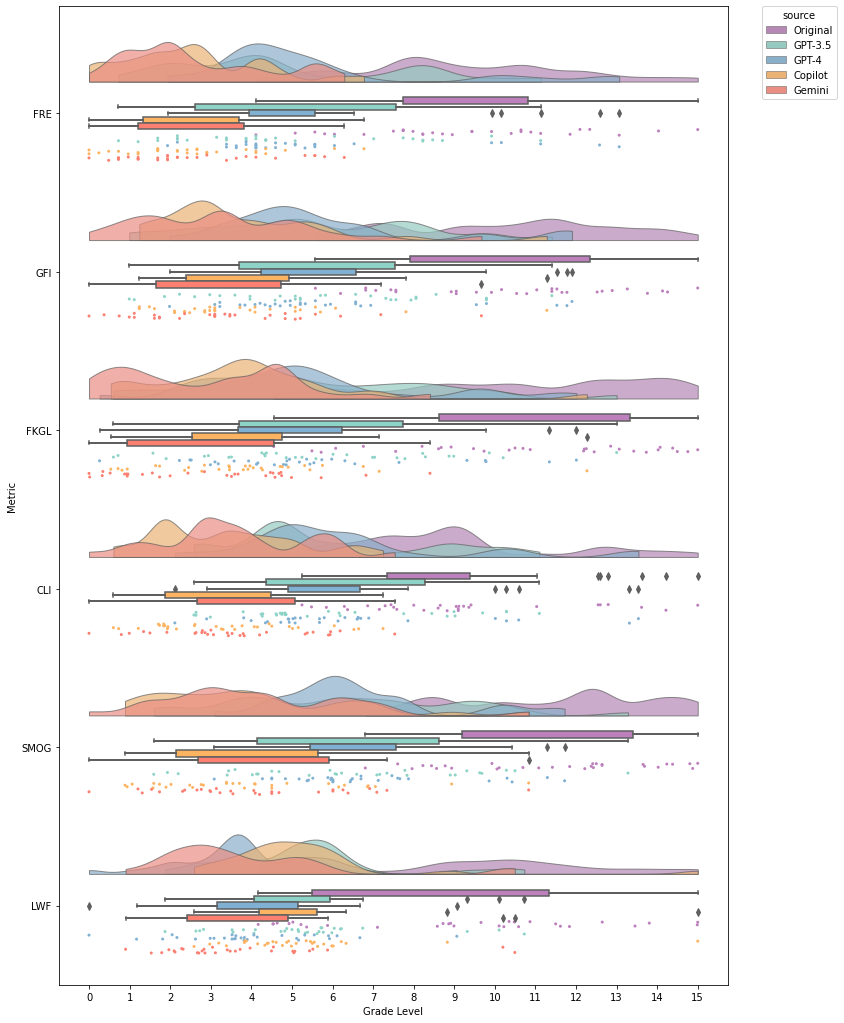

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt

def normalize_metrics(df, metrics):
    for metric in metrics:
        if metric == 'FRE':
            max_val = df[metric].max()
            min_val = df[metric].min()
            df[metric] = (max_val - df[metric]) / (max_val - min_val)
        else:
            max_val = df[metric].max()
            min_val = df[metric].min()
            df[metric] = (df[metric] - min_val) / (max_val - min_val)
    
    for metric in metrics:
        df[metric] = df[metric] * 15

    return df

def plot_raincloud(df, metrics):
    df = normalize_metrics(df, metrics)
    df = pd.melt(df, 
                 id_vars=['source'], value_vars=metrics, 
                  var_name='metric', value_name='value')
    
    f, ax = plt.subplots(figsize=(12, 18))
    ax = pt.RainCloud(x='metric', 
                      y='value', 
                      hue='source', 
                      data=df, 
                      palette=color_palette, 
                      bw=0.2, 
                      width_viol=0.5, 
                      ax=ax, orient='h', 
                      width_box=0.2, 
                      alpha=0.7, 
                      move=0.2,
                      dodge=True) 
    
    plt.xlabel('Grade Level')
    plt.ylabel('Metric')
    plt.xticks(np.arange(0, 16))
    plt.show()

file_path = './llm.csv'
metrics = ['FRE', 'GFI', 'FKGL', 'CLI', 'SMOG', 'LWF']
color_palette = ['#bc80bd', '#8dd3c7',  '#80b1d3', '#fdb462', '#fb8072']
    
df = pd.read_csv(file_path)
plot_raincloud(df, metrics)